In [1]:
from PIL import Image
import glob
import tensorflow as tf
import numpy as np
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten, Input
from keras.utils import np_utils
from keras.layers import Add
from keras.layers import concatenate
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
import matplotlib.pyplot as plt
import pandas as pd
import itertools  
import matplotlib.image as mpimg
%matplotlib inline
import math 
import datetime
import time



# First Thermal model 

image_list = []

def my_load_Train_data_1() :
    image_list = []
    for filename in glob.glob('C:/Users/MANDEEP SINGH SHERRY/Desktop/Thesis Research/Data_Augmentation/Thermal Images/training/*.jpg'): #assuming gif
        im=Image.open(filename)
        img = im.resize((32,32),Image.ANTIALIAS)
        img= tf.keras.preprocessing.image.img_to_array(img)
        img= img.reshape(32, 32, 3)
        img =img.astype('float32')
        img = img / 255.0
        image_list.append(img)

    return image_list

def my_load_Test_data_1() :
    image_list = []
    for filename in glob.glob('C:/Users/MANDEEP SINGH SHERRY/Desktop/Thesis Research/Data_Augmentation/Thermal Images/testing/*.jpg'): #assuming gif
        im=Image.open(filename)
        img = im.resize((32,32),Image.ANTIALIAS)
        img= tf.keras.preprocessing.image.img_to_array(img)
        img= img.reshape(32, 32, 3)
        img =img.astype('float32')
        img = img / 255.0
        image_list.append(img)

    return image_list

X1_train = my_load_Train_data_1()
X1_test = my_load_Test_data_1()
#print(len(X1_test))
y1_train = pd.read_csv('C:/Users/MANDEEP SINGH SHERRY/Desktop/Thesis Research/Data_Augmentation/y_labels_training.csv')
y1_test = pd.read_csv('C:/Users/MANDEEP SINGH SHERRY/Desktop/Thesis Research/Data_Augmentation/y_labels_testing.csv')
y1_test.values.reshape(-1,1)

n_classes = 8
X1_train = np.array(X1_train)
Y1_train = np.array(y1_train)
X1_test = np.array(X1_test)
Y1_test = np.array(y1_test)

Y1_train = np_utils.to_categorical(Y1_train, n_classes)
Y1_test = np_utils.to_categorical(Y1_test, n_classes)
# len(X1_train)
# print(Y1_test)
X1_train.shape
Y1_train.shape

#Secound Camera model

image_list = []

def my_load_Train_data_2() :
    image_list = []
    for filename in glob.glob('C:/Users/MANDEEP SINGH SHERRY/Desktop/Thesis Research/Data_Augmentation/Camera Images/training/*.jpg'): #assuming gif
        im=Image.open(filename)
        img = im.resize((32,32),Image.ANTIALIAS)
        img= tf.keras.preprocessing.image.img_to_array(img)
        img= img.reshape(32, 32, 3)
        img =img.astype('float32')
        img = img / 255.0
        image_list.append(img)

    return image_list

def my_load_Test_data_2() :
    image_list = []
    for filename in glob.glob('C:/Users/MANDEEP SINGH SHERRY/Desktop/Thesis Research/Data_Augmentation/Camera Images/testing/*.jpg'): #assuming gif
        im=Image.open(filename)
        img = im.resize((32,32),Image.ANTIALIAS)
        img= tf.keras.preprocessing.image.img_to_array(img)
        img= img.reshape(32, 32, 3)
        img =img.astype('float32')
        img = img / 255.0
        image_list.append(img)

    return image_list

X2_train = my_load_Train_data_2()
X2_test = my_load_Test_data_2()
print(len(X2_test))
y2_train = pd.read_csv('C:/Users/MANDEEP SINGH SHERRY/Desktop/Thesis Research/Data_Augmentation/y_labels_training.csv')
y2_test = pd.read_csv('C:/Users/MANDEEP SINGH SHERRY/Desktop/Thesis Research/Data_Augmentation/y_labels_testing.csv')
y2_test.values.reshape(-1,1)

n_classes = 8
X2_train = np.array(X2_train)
Y2_train = np.array(y2_train)
X2_test = np.array(X2_test)
Y2_test = np.array(y2_test)

Y2_train = np_utils.to_categorical(Y2_train, n_classes)
Y2_test = np_utils.to_categorical(Y2_test, n_classes)


# Model 1(Thermal)

inp1 = Input(shape=(32, 32, 3))

# convolutional layer
conv1=Conv2D(100, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(inp1)

# convolutional layer
conv2 =Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(conv1)
pool1=MaxPool2D(pool_size=(2,2))(conv2)
conv3=Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(pool1)
pool2=MaxPool2D(pool_size=(2,2))(conv3)

# flatten output of conv
flat1=Flatten()(pool2)

# hidden layer
hidd1=(Dense(25, activation='relu'))(flat1)
dense1=(Dense(10, activation='relu'))(hidd1)
output1=Flatten()(dense1)

#output= (Dense(10, activation='relu'))(model_1)

# Model 2

# convolutional layer
inp2 = Input(shape=(32, 32, 3))

# convolutional layer
conv1 =Conv2D(100, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(inp2)

# convolutional layer
conv2 =Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(conv1)
pool1=MaxPool2D(pool_size=(2,2))(conv2)
conv3=Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(pool1)
pool2=MaxPool2D(pool_size=(2,2))(conv3)

# flatten output of conv
flat1=Flatten()(pool2)

# hidden layer
hidd1=Dense(25, activation='relu')(flat1)
dense2=Dense(10, activation='relu')(hidd1)
output2=Flatten()(dense2)

print(output1)
print(output2)

# concatinate two models 

concat1 = concatenate([output1, output2])

Out  = Dense(8, activation='softmax')(concat1)

model_concat = Model(inputs=[inp1, inp2], outputs = Out)

# compiling the sequential model
model_concat.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam') 




# training the model for 10 epochs
history= model_concat.fit([X1_train,X2_train],Y2_train, batch_size=256,epochs=10,validation_data=([X1_test,X2_test],Y2_test))




3600
KerasTensor(type_spec=TensorSpec(shape=(None, 10), dtype=tf.float32, name=None), name='flatten_1/Reshape:0', description="created by layer 'flatten_1'")
KerasTensor(type_spec=TensorSpec(shape=(None, 10), dtype=tf.float32, name=None), name='flatten_3/Reshape:0', description="created by layer 'flatten_3'")
Epoch 1/10
71/71 [==============================] - 401s 6s/step - loss: 1.7651 - accuracy: 0.3200 - val_loss: 1.4712 - val_accuracy: 0.4450
Epoch 2/10
71/71 [==============================] - 496s 7s/step - loss: 1.1253 - accuracy: 0.5864 - val_loss: 1.0752 - val_accuracy: 0.6050
Epoch 3/10
71/71 [==============================] - 473s 7s/step - loss: 0.8196 - accuracy: 0.6983 - val_loss: 0.9616 - val_accuracy: 0.6431
Epoch 4/10
71/71 [==============================] - 421s 6s/step - loss: 0.6806 - accuracy: 0.7584 - val_loss: 0.8875 - val_accuracy: 0.6667
Epoch 5/10
71/71 [==============================] - 450s 6s/step - loss: 0.5869 - accuracy: 0.7918 - val_loss: 0.9111 - val_a

In [2]:
model_concat.save('Concat_Model')
#model.save_weights(top_model_weights_path)
start = datetime.datetime.now()
(eval_loss, eval_accuracy) = model_concat.evaluate([X1_test,X2_test],Y2_test, batch_size=128, verbose=1)
print('[INFO] Accuracy: {:.2f}%'.format(eval_accuracy * 100)) 
print('[INFO] Loss: {}'.format(eval_loss)) 
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

INFO:tensorflow:Assets written to: Concat_Model\assets
29/29 [==============================] - 15s 502ms/step - loss: 0.8624 - accuracy: 0.7211
[INFO] Accuracy: 72.11%
[INFO] Loss: 0.8623694777488708
Time:  0:00:14.751877


Fusion of thermal_bottle215.jpg and camera_chair258.jpg are: 
Input image: chair_bottle

probality of chair_bottle:  0.01625279983272776

probality of plate_bottle:  2.007211952204102e-07

probality of spectacle_laptop:  94.70235705375671

probality of table_bottle:  0.06953729316592216

probality of table_chair:  0.5681306589394808

probality of table_laptop:  0.009958387818187475

probality of table_plate:  1.1881310492753983

probality of table_spectacle:  3.445631265640259


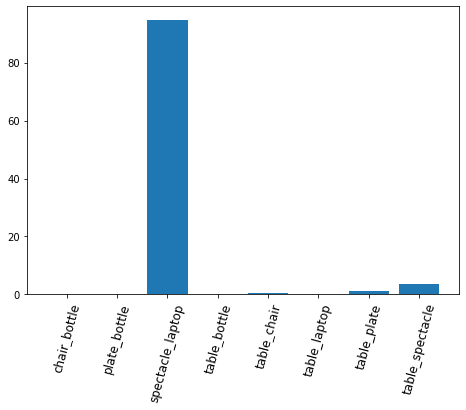

__________________________________________________________________
Fusion of thermal_bottle215.jpg and camera_plate273.jpg are: 
Input image: plate_bottle

probality of chair_bottle:  1.1925091035664082

probality of plate_bottle:  6.638792626745271e-07

probality of spectacle_laptop:  0.09067390346899629

probality of table_bottle:  0.0005232148396316916

probality of table_chair:  96.43299579620361

probality of table_laptop:  1.7196975648403168

probality of table_plate:  0.007150534656830132

probality of table_spectacle:  0.5564491730183363


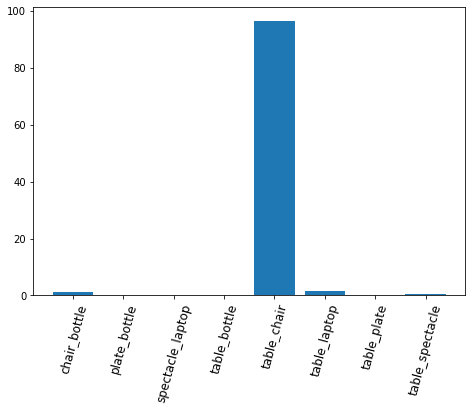

__________________________________________________________________
Fusion of thermal_laptop258.jpg and camera_spectacle279.jpg are: 
Input image: spectacle_laptop

probality of chair_bottle:  0.0175509208929725

probality of plate_bottle:  9.832726846070727e-05

probality of spectacle_laptop:  36.322301626205444

probality of table_bottle:  16.16606116294861

probality of table_chair:  5.302751171650487e-12

probality of table_laptop:  2.353054071591032e-05

probality of table_plate:  47.251659631729126

probality of table_spectacle:  0.24230240378528833


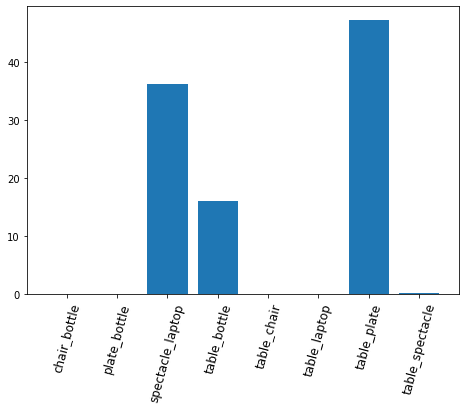

__________________________________________________________________
Fusion of thermal_bottle215.jpg and camera_table252.jpg are: 
Input image: table_bottle

probality of chair_bottle:  0.014347869728226215

probality of plate_bottle:  2.1191167310502523e-10

probality of spectacle_laptop:  31.33009970188141

probality of table_bottle:  0.04400898760650307

probality of table_chair:  2.3103586752060146e-09

probality of table_laptop:  0.00030206288101908285

probality of table_plate:  40.67685008049011

probality of table_spectacle:  27.93439030647278


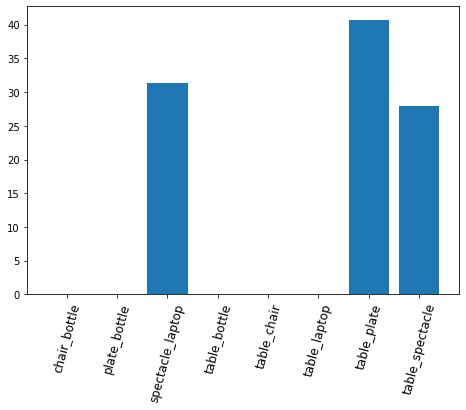

__________________________________________________________________
Fusion of thermal_chair261.jpg and camera_table252.jpg are: 
Input image: table_chair

probality of chair_bottle:  0.0046627486881334335

probality of plate_bottle:  4.16555353578707e-11

probality of spectacle_laptop:  14.992457628250122

probality of table_bottle:  0.014238650328479707

probality of table_chair:  4.5348993657490233e-10

probality of table_laptop:  0.0001352817321276234

probality of table_plate:  30.253887176513672

probality of table_spectacle:  54.734617471694946


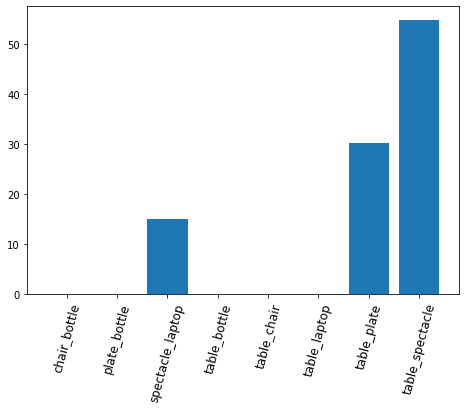

__________________________________________________________________
Fusion of thermal_laptop258.jpg and camera_table252.jpg are: 
Input image: table_laptop

probality of chair_bottle:  0.11122748255729675

probality of plate_bottle:  0.0001994592366827419

probality of spectacle_laptop:  25.043565034866333

probality of table_bottle:  2.7044910937547684

probality of table_chair:  5.535977373808927e-13

probality of table_laptop:  1.927171808802086e-05

probality of table_plate:  71.57090902328491

probality of table_spectacle:  0.5695783998817205


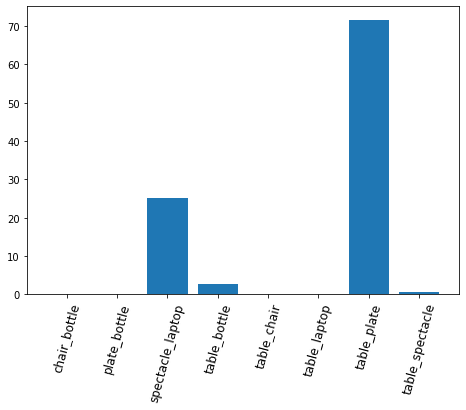

__________________________________________________________________
Fusion of thermal_plate260.jpg and camera_table252.jpg are: 
Input image: table_plate

probality of chair_bottle:  0.0594999932218343

probality of plate_bottle:  6.223296329627799e-13

probality of spectacle_laptop:  9.185632318258286

probality of table_bottle:  0.0006082316303945845

probality of table_chair:  1.3239964680167304e-08

probality of table_laptop:  0.0019046787201659754

probality of table_plate:  2.226254902780056

probality of table_spectacle:  88.5261058807373


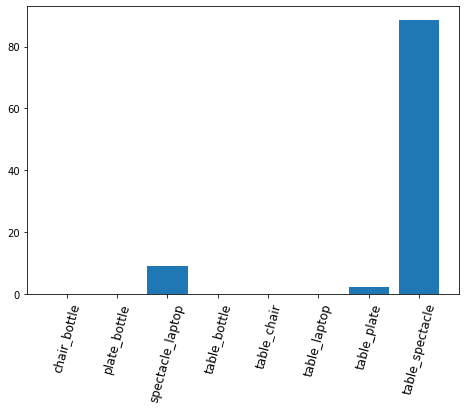

__________________________________________________________________
Fusion of thermal_spectacle261.jpg and camera_table252.jpg are: 
Input image: table_spectacle

probality of chair_bottle:  0.01804109924705699

probality of plate_bottle:  0.0005707149284717161

probality of spectacle_laptop:  1.0991213843226433

probality of table_bottle:  0.00015352909485955024

probality of table_chair:  1.946633839907709e-12

probality of table_laptop:  0.00025754109174158657

probality of table_plate:  98.88150095939636

probality of table_spectacle:  0.00035217103686591145


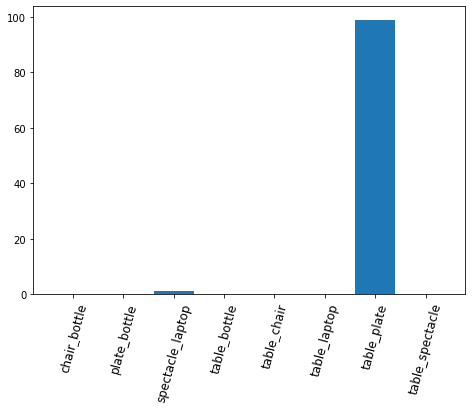

__________________________________________________________________


In [3]:

# make a prediction for a new image.
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array


ListPic1 = ['thermal_bottle215.jpg','thermal_bottle215.jpg','thermal_laptop258.jpg','thermal_bottle215.jpg',
           'thermal_chair261.jpg','thermal_laptop258.jpg','thermal_plate260.jpg','thermal_spectacle261.jpg']


ListPic2 = ['camera_chair258.jpg','camera_plate273.jpg','camera_spectacle279.jpg','camera_table252.jpg',
             'camera_table252.jpg','camera_table252.jpg','camera_table252.jpg','camera_table252.jpg'] 


ListPic2[0]
for i in range(len(ListPic1)): 

 
    # load the image thermal
    img1 = load_img(ListPic1[i], target_size=(32, 32))
    # convert to array
    img1 = img_to_array(img1)
    # reshape into a single sample with 3 channels
    img1 = img1.reshape(1,32, 32, 3)
    # prepare pixel data
    img1 = img1.astype('float32')
    img1 = img1 / 255.0

 # for second Model
 # load the camera image
    
    img2 = load_img(ListPic2[i], target_size=(32, 32))
    # convert to array
    img2 = img_to_array(img2)
    # reshape into a single sample with 3 channels
    img2 = img2.reshape(1,32, 32, 3)
    # prepare pixel data
    img2 = img2.astype('float32')
    img2 = img2 / 255.0
    

    x = ['chair_bottle','plate_bottle','spectacle_laptop','table_bottle','table_chair','table_laptop','table_plate', 'table_spectacle']
    print('Fusion of ' +ListPic1[i]+ ' and ' +ListPic2[i]+ ' are: ')
    result = model_concat.predict([img1,img2])
    #print(result)
    #print(item1,item2)
 
   
    print('Input image:',x[i])
    #print(result)
    print('')
    Bed = result[0][0]*100
    print("probality of chair_bottle: ", Bed)
    print()
    Bottle = result[0][1]*100
    print("probality of plate_bottle: ", Bottle)
    print()
    Chair = result[0][2]*100
    print("probality of spectacle_laptop: ", result[0][2]*100)
    print()
    Laptop = result[0][3]*100
    print("probality of table_bottle: ", result[0][3]*100)
    print()
    Plate = result[0][4]*100
    print("probality of table_chair: ", result[0][4]*100)
    print()
    Sofa = result[0][5]*100   
    print("probality of table_laptop: ", result[0][5]*100)
    print()
    Spectacle = result[0][6]*100
    print("probality of table_plate: ", result[0][6]*100)
    print()
    Table = result[0][7]*100   
    print("probality of table_spectacle: ", result[0][7]*100)
    
    # importing the required module
    import matplotlib.pyplot as plt
  
    fig = plt.figure()
    plt.rcParams['xtick.labelsize'] = 'large' 
    ax = fig.add_axes([0,0,1,1])    

    # x axis values
    x = ['chair_bottle','plate_bottle','spectacle_laptop','table_bottle','table_chair','table_laptop','table_plate', 'table_spectacle']
    # corresponding y axis values
    y = [Bed,Bottle,Chair,Laptop,Plate,Sofa,Spectacle,Table]

    ax.bar(x,y)
    plt.xticks(rotation=75)
    plt.show()   
    
    print("__________________________________________________________________")

In [4]:
import numpy as np
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
import itertools  


preds = np.round(model_concat.predict([X1_test,X2_test]),0)
#print('rounded test_labels', preds)


print('Classification Matrix')

fusion = ['chair_bottle','plate_bottle','spectacle_laptop','table_bottle','table_chair','table_laptop','table_plate', 'table_spectacle']
classification_metrics = metrics.classification_report(Y2_test, preds,target_names = fusion)
print(classification_metrics)

print('Confusion Matrix')

sign=[0,1,2,3,4,5,6,7]
cf_matrix = confusion_matrix(Y2_test.argmax(axis=1), preds.argmax(axis=1),sign)
print(cf_matrix)

Classification Matrix
                  precision    recall  f1-score   support

    chair_bottle       0.71      0.66      0.69       450
    plate_bottle       0.99      1.00      1.00       450
spectacle_laptop       0.58      0.77      0.66       450
    table_bottle       0.67      0.62      0.64       450
     table_chair       0.98      0.85      0.91       450
    table_laptop       0.70      0.78      0.74       450
     table_plate       0.58      0.35      0.44       450
 table_spectacle       0.87      0.50      0.63       450

       micro avg       0.75      0.69      0.72      3600
       macro avg       0.76      0.69      0.71      3600
    weighted avg       0.76      0.69      0.71      3600
     samples avg       0.69      0.69      0.69      3600

Confusion Matrix
[[344   3  28   4   5  54   7   5]
 [  1 449   0   0   0   0   0   0]
 [ 43   0 348  14   0   6  32   7]
 [ 50   0  36 279   0  45  25  15]
 [ 20   0  25   0 383  19   3   0]
 [ 70   0   5  15   1 352   7

C:\Users\MANDEEP SINGH SHERRY\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MANDEEP SINGH SHERRY\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass labels=[0, 1, 2, 3, 4, 5, 6, 7] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Normalized confusion matrix


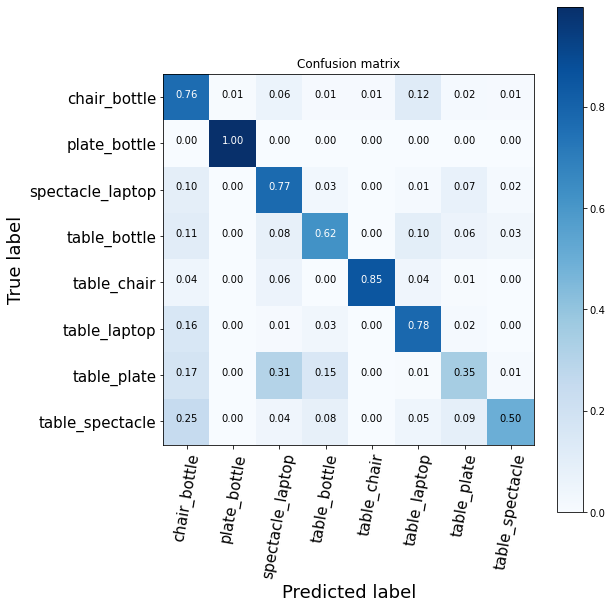

In [5]:
import numpy as np
%matplotlib inline
from sklearn.metrics import confusion_matrix

categorical_test_labels = pd.DataFrame(Y1_test).idxmax(axis=1)
categorical_preds = pd.DataFrame(preds).idxmax(axis=1)
confusion_matrix= confusion_matrix(categorical_test_labels, categorical_preds)

#To get better visual of the confusion matrix:
def plot_confusion_matrix(cm, classes,
   normalize=False,
   title='Confusion matrix',
   cmap=plt.cm.Blues):
 
#Add Normalization Option
 #‘’’prints pretty confusion metric with normalization option ‘’’
   if normalize:
     cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
     print('Normalized confusion matrix')
   else:
     print('Confusion matrix, without normalization')
 
# print(cm)
   plt.figure(figsize=(8, 8))
   plt.imshow(cm, interpolation='nearest', cmap=cmap)
   plt.title(title)
   plt.colorbar()
   tick_marks = np.arange(len(classes))
   plt.xticks(tick_marks, classes, rotation=45)
   plt.yticks(tick_marks, classes)
 
   fmt = '.2f' if normalize else 'd'
   thresh = cm.max() / 2.
   for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt), horizontalalignment='center', color='white' if cm[i, j] > thresh else 'black')
 
   plt.tight_layout()
    
    # Labels, title and ticks
   label_font = {'size':'18'}  # Adjust to fit
   plt.xlabel('Predicted label', fontdict=label_font);
   plt.ylabel('True label', fontdict=label_font);
   plt.tick_params(labelsize = 15) 
   plt.xticks(rotation=80)   
    
    
plot_confusion_matrix(confusion_matrix, fusion , normalize= True) 